# Data Analysis

In [450]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

Define some constant for plots

In [451]:
LANG="en_US.UTF-8"
LANGUAGE="en_US.UTF-8"
LC_ALL="en_US.UTF-8"

sns.set(font='Jetbrains Mono') # Set font


facecolor_reactive_local = [111/255, 178/255, 228/255, .85]
edgecolor_reactive_local = [111/255, 178/255, 228/255, 1.]
label_reactive_local = "Reactive Local Scaling"

facecolor_reactive_global = [48/255, 112/255, 173/255, .85]
edgecolor_reactive_global = [48/255, 112/255, 173/255, 1.]
label_reactive_global = "Reactive Global Scaling"

facecolor_proactive_global = [221/255, 162/255, 55/255, .85]
edgecolor_proactive_global = [221/255, 162/255, 55/255, 1.]
label_proactive_global = "Proactive Global Scaling"

facecolor_hybrid = [204/255, 121/255, 167/255, .85]
edgecolor_hybrid = [204/255, 121/255, 167/255, 1.]
label_hybrid = "Proactive-Reactive Global Scaling"

usecols_global = [0,1,3,7,9,13]
usecols_local = [0,1,3,7,9,13]
usecols_local2 = [0,1,3,7,9,11]
usecols_proactive = [0,1,3,5,9,11,15]
usecols_proactive_reactive = [0,1,7,11,13,15,17]



# Service Replication

## Specification Level

In [452]:
level = 'specification_level'

### TeaStore

In [453]:
target_cols = ['Latency (ms)', 'Deployed instances', 'Message Loss']
target_labels = ['Latency (milliseconds)', 'Deployed Microservices', 'Message Loss']
save_labels = ['latency', 'deployed_instaces', 'loss']
run = 25
system_data = 'teastore'
gs_data = 'reactive_gs'
ls_data = 'reactive_ls'
column_names = [
    "Time (ms)", 
    "Latency (ms)", 
    "Measured Workload",
    "Completed msgs",
    "Message Loss",
    "Deployed instances",
]

In [454]:
dfs_global_spec_teastore = []
dfs_local_spec_teastore = []

global_files = [level + '/' + system_data + '/' + gs_data + '/' + 'run' + str(x) + '.txt' for x in range(1,26)]
local_files = [level + '/' + system_data + '/' + ls_data + '/' + 'run' + str(x) + '.txt' for x in range(1,26)]

for file in global_files: 
    df = pd.read_csv(file, sep='\s+', usecols=usecols_global, names=column_names, skiprows=[])
    dfs_global_spec_teastore += [df]

for file in local_files: 
    df = pd.read_csv(file, sep='\s+', usecols=usecols_local, names=column_names, skiprows=[])
    dfs_local_spec_teastore += [df]

avg_spec_reactive_gs_teastore = pd.concat(dfs_global_spec_teastore).groupby(level=0).mean()
avg_spec_reactive_ls_teastore = pd.concat(dfs_local_spec_teastore).groupby(level=0).mean()

<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
/var/folders/jy/fgsfhg4173l0ht09bdq58g5r0000gn/T/ipykernel_15685/841213283.py:8: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(file, sep='\s+', usecols=usecols_global, names=column_names, skiprows=[])
/var/folders/jy/fgsfhg4173l0ht09bdq58g5r0000gn/T/ipykernel_15685/841213283.py:12: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(file, sep='\s+', usecols=usecols_local, names=column_names, skiprows=[])


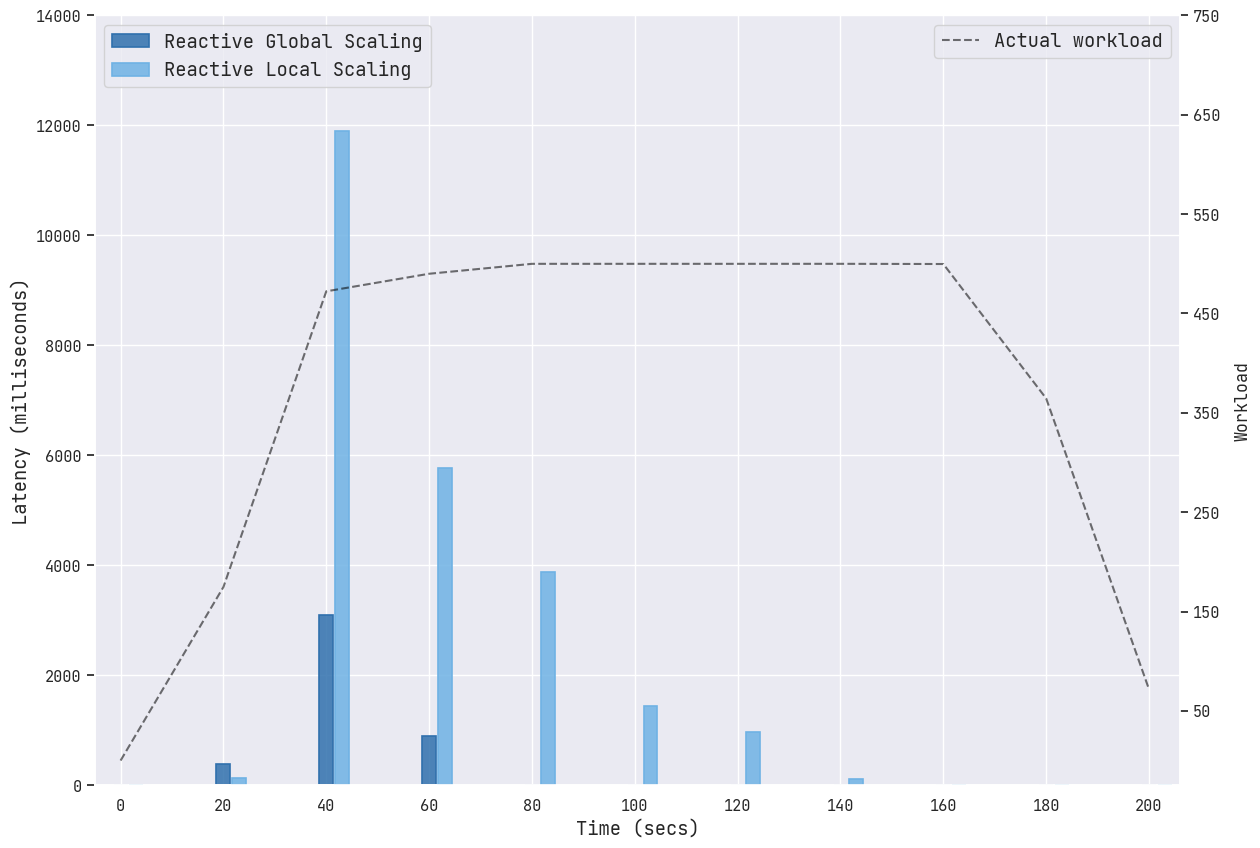

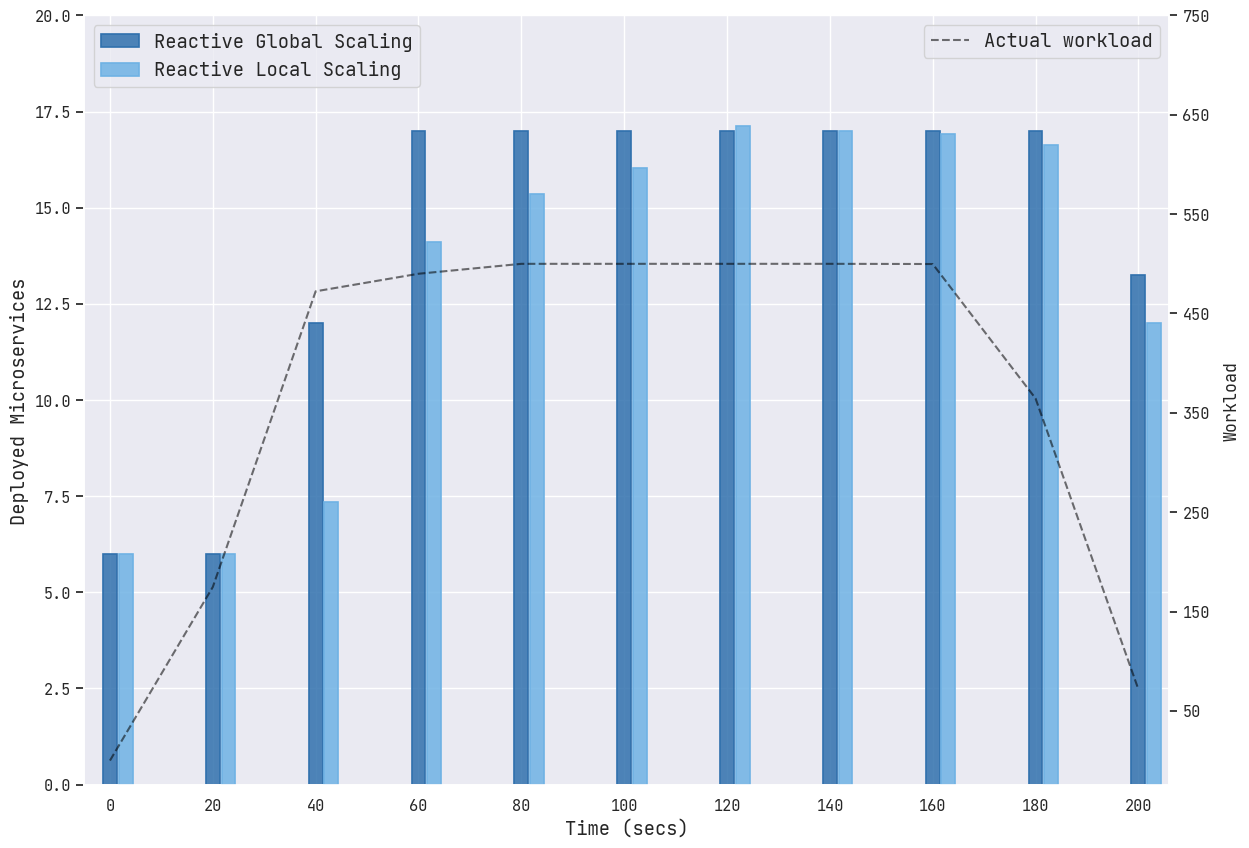

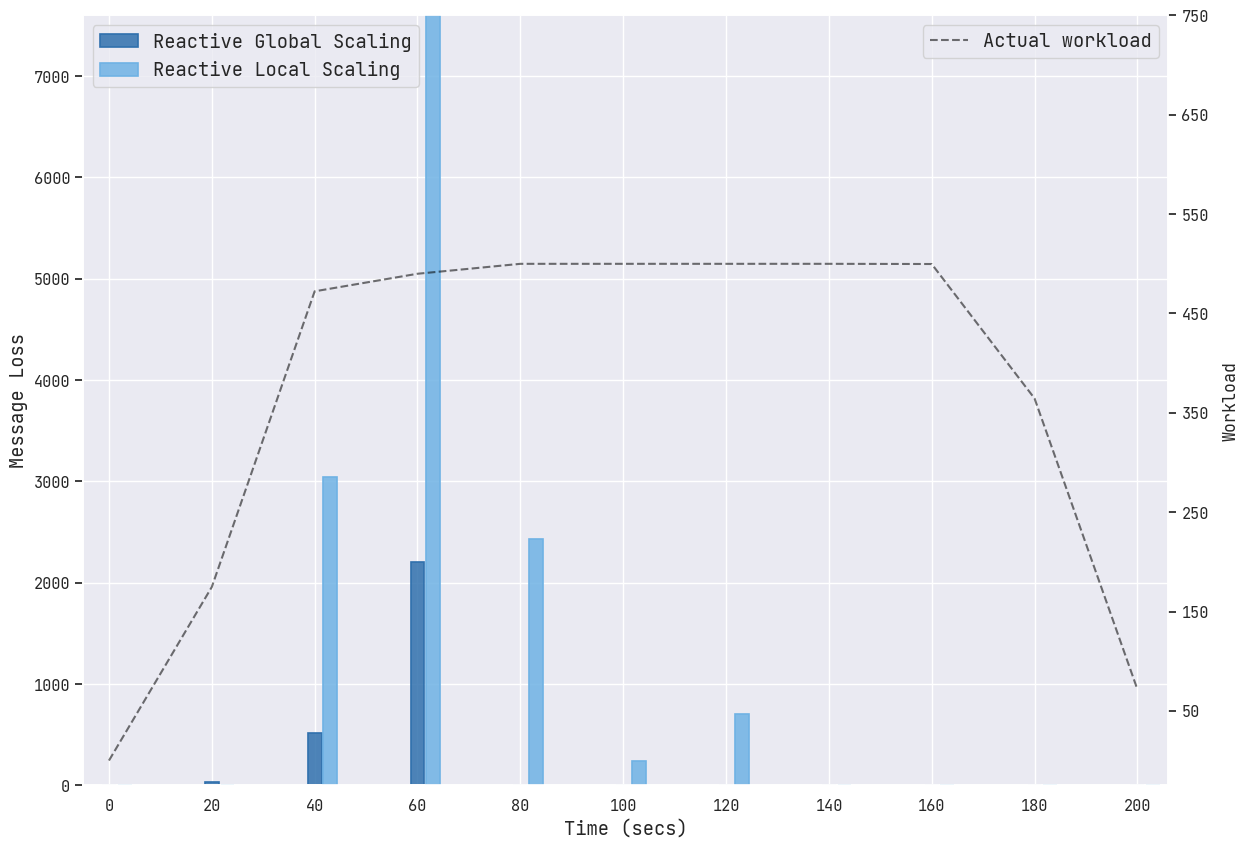

In [455]:
for target_col, target_label, save_label in zip(target_cols, target_labels, save_labels):
    x = avg_spec_reactive_gs_teastore['Time (ms)']
    y_msgs = avg_spec_reactive_gs_teastore['Measured Workload']
    y_global = avg_spec_reactive_gs_teastore[target_col]
    y_local = avg_spec_reactive_ls_teastore[target_col]
    fig = plt.figure(figsize=[14,10])
    ax = plt.subplot(111)
    ax_background = ax.twinx()

    width = 2.7

    if save_label == 'latency':
        up = 14000
        down = -1
    elif save_label == 'deployed_instaces':
        up = 20
        down = -.02
    else:
        up = 7600
        down = -1


    # define plots
    g = ax.bar(
        x, 
        y_global, 
        linestyle='solid', 
        facecolor=facecolor_reactive_global,
        edgecolor=edgecolor_reactive_global,
        linewidth=1.2,
        label=label_reactive_global,
        zorder=1,
        width=width,
    )
    l = ax.bar(
        x+width+0.35, 
        y_local, 
        linestyle='solid', 
        facecolor=facecolor_reactive_local,
        edgecolor=edgecolor_reactive_local,
        linewidth=1.2,
        label=label_reactive_local, 
        zorder=100,
        width=width,
    )


    # define background plot
    arrived_msgs = ax_background.plot(x, y_msgs, linestyle='dashed', label='Actual workload', color='black', zorder=1000, alpha=.55)

    # set axis limits
    ax.set_yscale('linear')
    ax.set_xlim(-5, 206)
    ax.set_ylim(down, up)

    # set ticks and labels
    ax.set_ylabel(target_label, fontsize=13.5)
    ax.set_xlabel('Time (secs)', fontsize=13.5)
    ax.set_xticks(range(0, 210, 20))
    #ax.set_xticklabels(['10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '00', '01', '02', '03', '04', '05', '06'])

    # background ticks and labels
    ax_background.set_yticks(range(50, 800, 100))
    ax_background.grid(False)
    ax_background.yaxis.set_label_coords(1.05, 0.5)
    ax_background.set_ylabel('Workload')

    # legend settings
    ax.legend(loc='upper left', ncol=1, frameon=True, fontsize=13.5)
    ax_background.legend(loc='upper right', ncol=1, frameon=True, fontsize=13.5)

    fig.savefig(f'./fig/{save_label}_{system_data}_{level}_reactiveL_vs_reactiveG.pdf', dpi=300, format='pdf', bbox_inches='tight')
    

### Email System

In [456]:
target_cols = ['Latency (ms)', 'Deployed instances', 'Message Loss']
target_labels = ['Latency (milliseconds)', 'Deployed Microservices', 'Message Loss']
save_labels = ['latency', 'deployed_instaces', 'loss']
run = 25
system_data = 'email_sys'
reactive_gs_data = 'reactive_gs'
reactive_ls_data = 'reactive_ls'
proactive_gs_data = 'proactive_gs_outliers'
proactive_reactive_data = 'proactive_reactive_gs_outliers'

column_names = [
    "Time (ms)", 
    "Latency (ms)", 
    "Measured Workload",
    "Completed msgs",
    "Message Loss",
    "Deployed instances",
]

column_names_proactive = [
    "Time (ms)", 
    "Latency (ms)", 
    "Predicted Workload",
    "Measured Workload",
    "Completed msgs",
    "Message Loss",
    "Deployed instances",
]

In [457]:
dfs_reactive_gs_spec_email_sys = []
dfs_reactive_ls_spec_email_sys = []
dfs_proactive_gs_spec_email_sys = []
dfs_proactive_reactive_gs_spec_email_sys = []

reactive_gs_files = [level + '/' + system_data + '/' + reactive_gs_data + '/' + 'run' + str(x) + '.txt' for x in range(1,26)]
reactive_ls_files = [level + '/' + system_data + '/' + reactive_ls_data + '/' + 'run' + str(x) + '.txt' for x in range(1,26)]
proactive_gs_files = [level + '/' + system_data + '/' + proactive_gs_data + '/' + 'run' + str(x) + '.txt' for x in range(1,26)]
proactive_reactive_gs_files = [level + '/' + system_data + '/' + proactive_reactive_data + '/' + 'run' + str(x) + '.txt' for x in range(1,26)]



for file in reactive_gs_files: 
    df = pd.read_csv(file, sep='\s+', usecols=usecols_global, names=column_names, skiprows=[])
    dfs_reactive_gs_spec_email_sys += [df]

for file in reactive_ls_files: 
    df = pd.read_csv(file, sep='\s+', usecols=usecols_local2, names=column_names, skiprows=[])
    dfs_reactive_ls_spec_email_sys += [df]
    
for file in proactive_gs_files: 
    df = pd.read_csv(file, sep='\s+', usecols=usecols_proactive, names=column_names_proactive, skiprows=[])
    dfs_proactive_gs_spec_email_sys += [df]

for file in proactive_reactive_gs_files: 
    df = pd.read_csv(file, sep='\s+', usecols=usecols_proactive, names=column_names_proactive, skiprows=[])
    dfs_proactive_reactive_gs_spec_email_sys += [df]

avg_spec_reactive_gs_email_sys = pd.concat(dfs_reactive_gs_spec_email_sys).groupby(level=0).mean()
avg_spec_reactive_ls_email_sys = pd.concat(dfs_reactive_ls_spec_email_sys).groupby(level=0).mean()
avg_spec_proactive_gs_email_sys = pd.concat(dfs_proactive_gs_spec_email_sys).groupby(level=0).mean()
avg_spec_proactive_reactive_gs_email_sys = pd.concat(dfs_proactive_reactive_gs_spec_email_sys).groupby(level=0).mean()

<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:22: SyntaxWarning: invalid escape sequence '\s'
<>:26: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:22: SyntaxWarning: invalid escape sequence '\s'
<>:26: SyntaxWarning: invalid escape sequence '\s'
/var/folders/jy/fgsfhg4173l0ht09bdq58g5r0000gn/T/ipykernel_15685/4162757022.py:14: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(file, sep='\s+', usecols=usecols_global, names=column_names, skiprows=[])
/var/folders/jy/fgsfhg4173l0ht09bdq58g5r0000gn/T/ipykernel_15685/4162757022.py:18: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(file, sep='\s+', usecols=usecols_local2, names=column_names, skiprows=[])
/var/folders/jy/fgsfhg4173l0ht09bdq58g5r0000gn/T/ipykernel_15685/4162757022.py:22: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(file, 

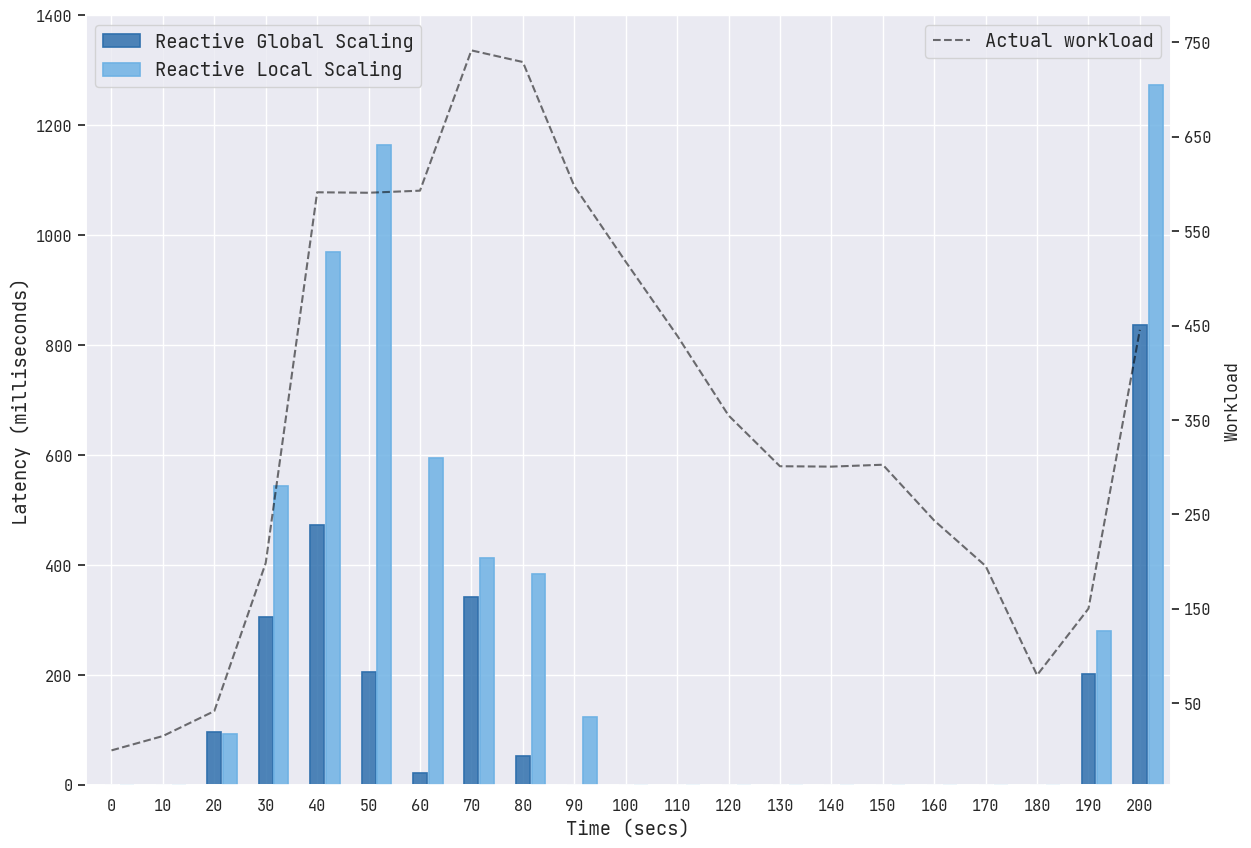

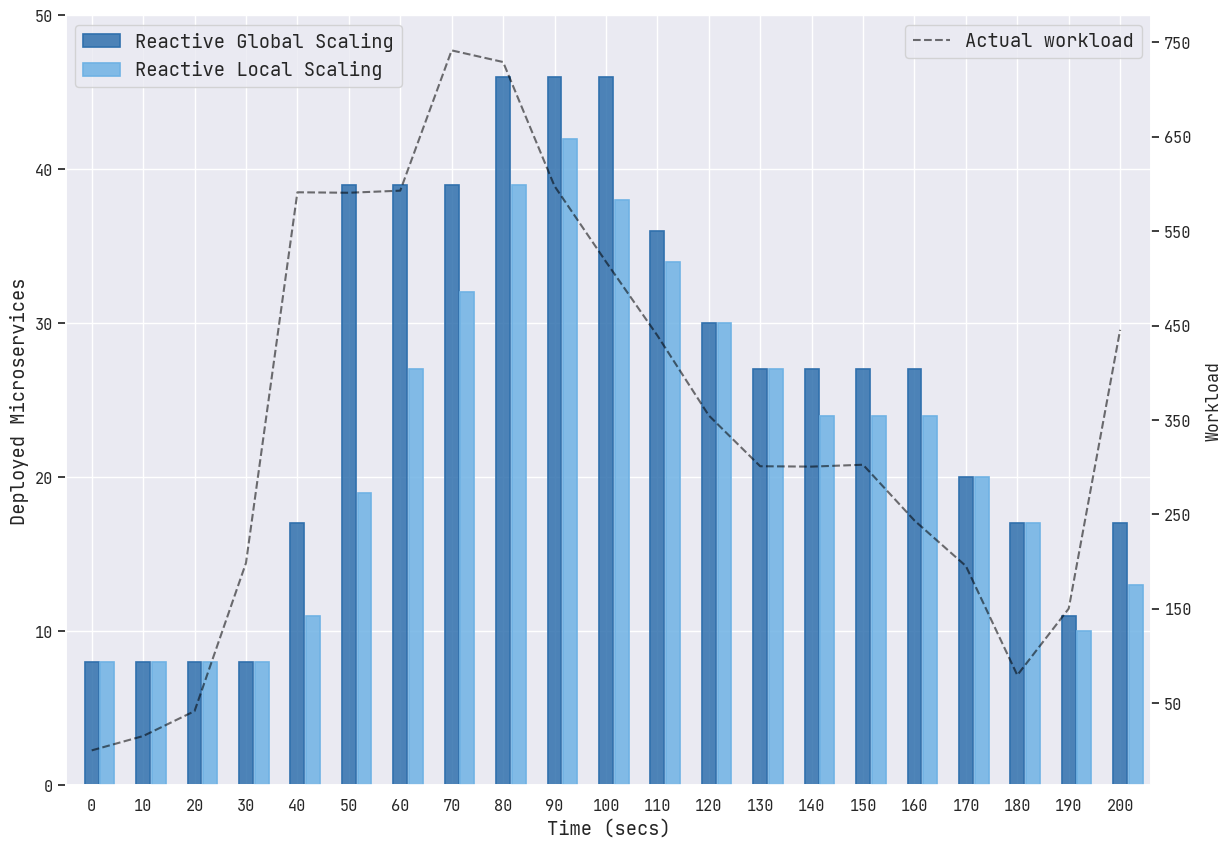

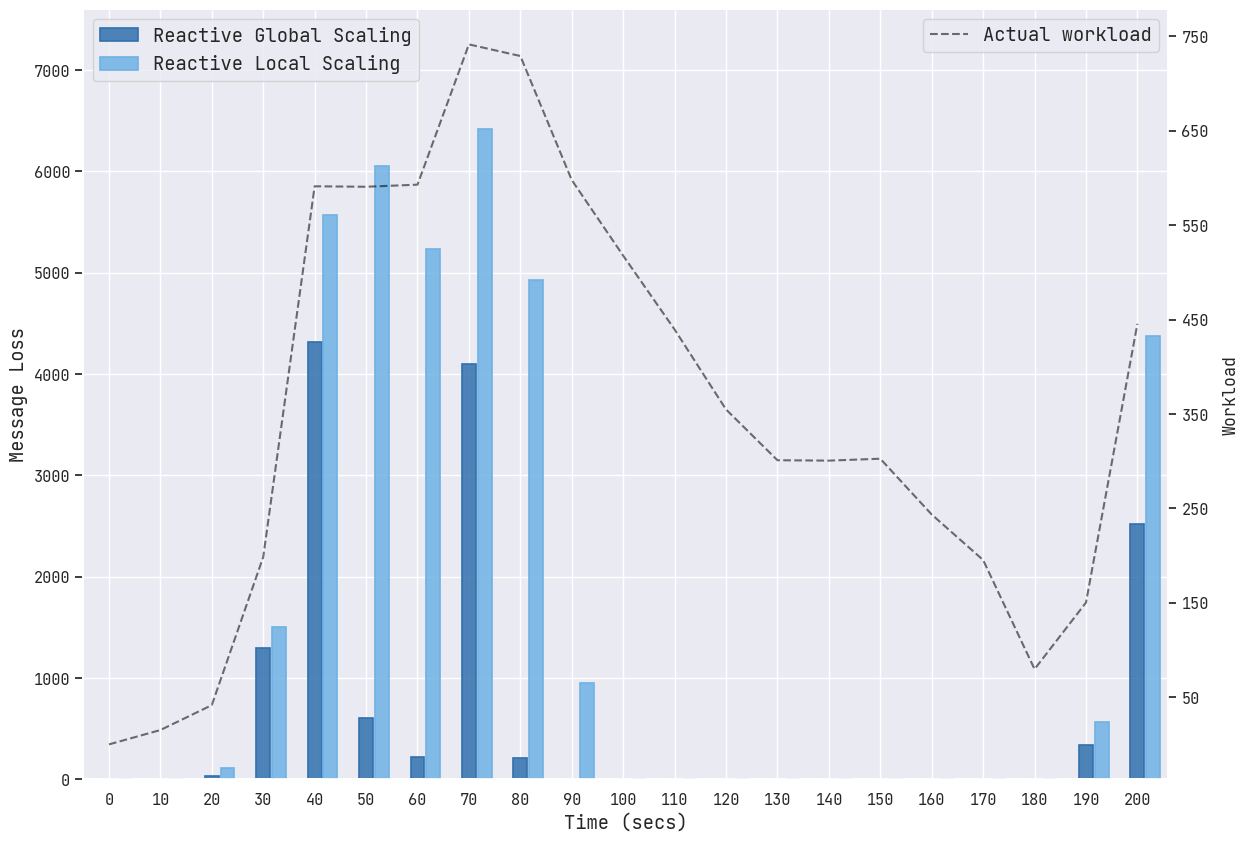

In [458]:
for target_col, target_label, save_label in zip(target_cols, target_labels, save_labels):
    x = avg_spec_reactive_gs_email_sys['Time (ms)']
    y_msgs = avg_spec_reactive_gs_email_sys['Measured Workload']
    y_global = avg_spec_reactive_gs_email_sys[target_col]
    y_local = avg_spec_reactive_ls_email_sys[target_col]
    fig = plt.figure(figsize=[14,10])
    ax = plt.subplot(111)
    ax_background = ax.twinx()

    width = 2.7

    if save_label == 'latency':
        up = 1400
        down = -1
    elif save_label == 'deployed_instaces':
        up = 50
        down = -.02
    else:
        up = 7600
        down = -1


    # define plots
    g = ax.bar(
        x, 
        y_global, 
        linestyle='solid', 
        facecolor=facecolor_reactive_global,
        edgecolor=edgecolor_reactive_global,
        linewidth=1.2,
        label=label_reactive_global,
        zorder=1,
        width=width,
    )
    l = ax.bar(
        x+width+0.35, 
        y_local, 
        linestyle='solid', 
        facecolor=facecolor_reactive_local,
        edgecolor=edgecolor_reactive_local,
        linewidth=1.2,
        label=label_reactive_local, 
        zorder=100,
        width=width,
    )


    # define background plot
    arrived_msgs = ax_background.plot(x, y_msgs, linestyle='dashed', label='Actual workload', color='black', zorder=1000, alpha=.55)

    # set axis limits
    ax.set_yscale('linear')
    ax.set_xlim(-5, 206)
    ax.set_ylim(down, up)

    # set ticks and labels
    ax.set_ylabel(target_label, fontsize=13.5)
    ax.set_xlabel('Time (secs)', fontsize=13.5)
    ax.set_xticks(range(0, 210, 10))
    #ax.set_xticklabels(['10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '00', '01', '02', '03', '04', '05', '06'])

    # background ticks and labels
    ax_background.set_yticks(range(50, 800, 100))
    ax_background.grid(False)
    ax_background.yaxis.set_label_coords(1.05, 0.5)
    ax_background.set_ylabel('Workload')

    # legend settings
    ax.legend(loc='upper left', ncol=1, frameon=True, fontsize=13.5)
    ax_background.legend(loc='upper right', ncol=1, frameon=True, fontsize=13.5)

    fig.savefig(f'./fig/{save_label}_{system_data}_{level}_reactiveL_vs_reactiveG.pdf', dpi=300, format='pdf', bbox_inches='tight')
    

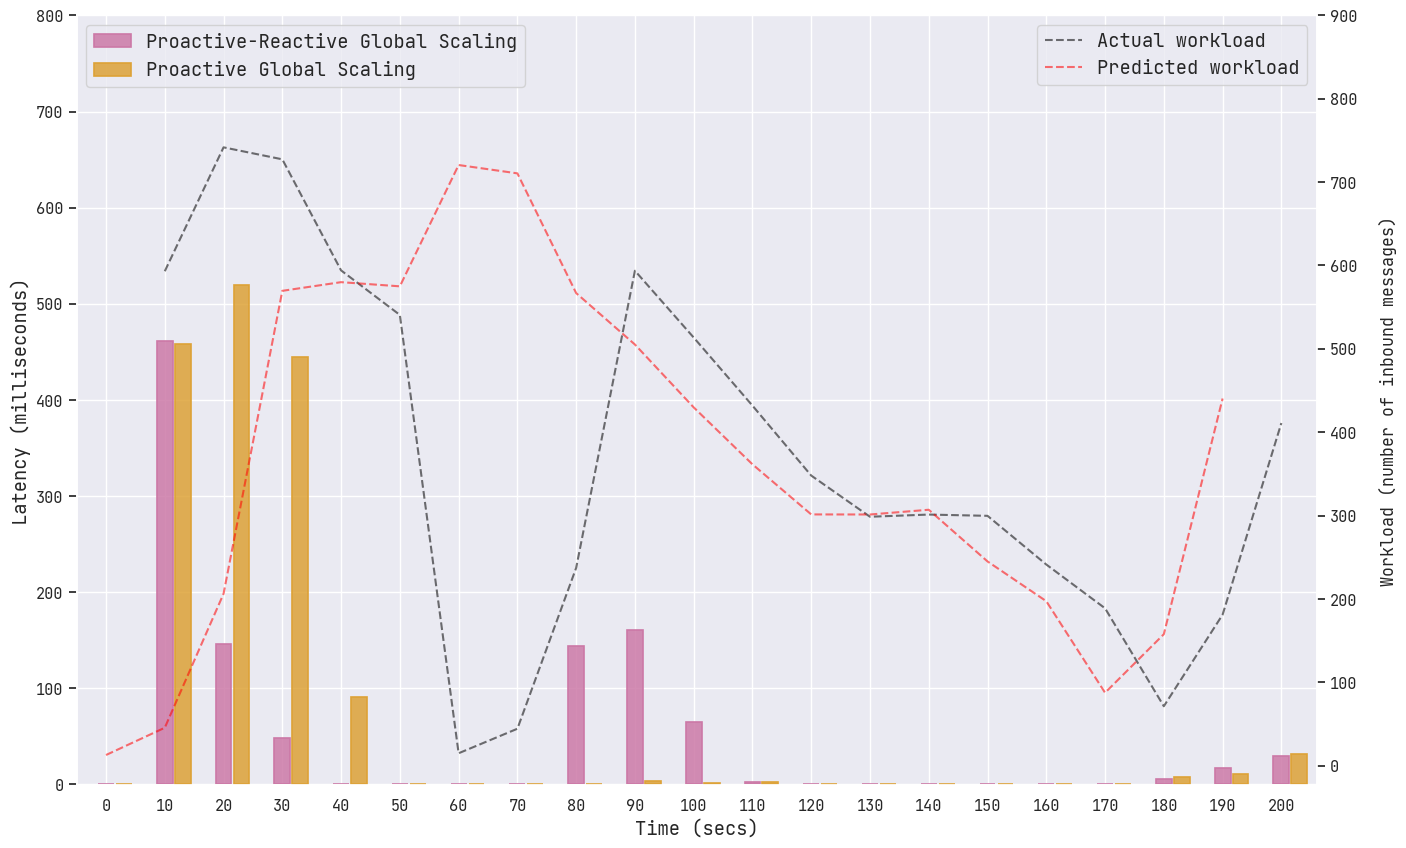

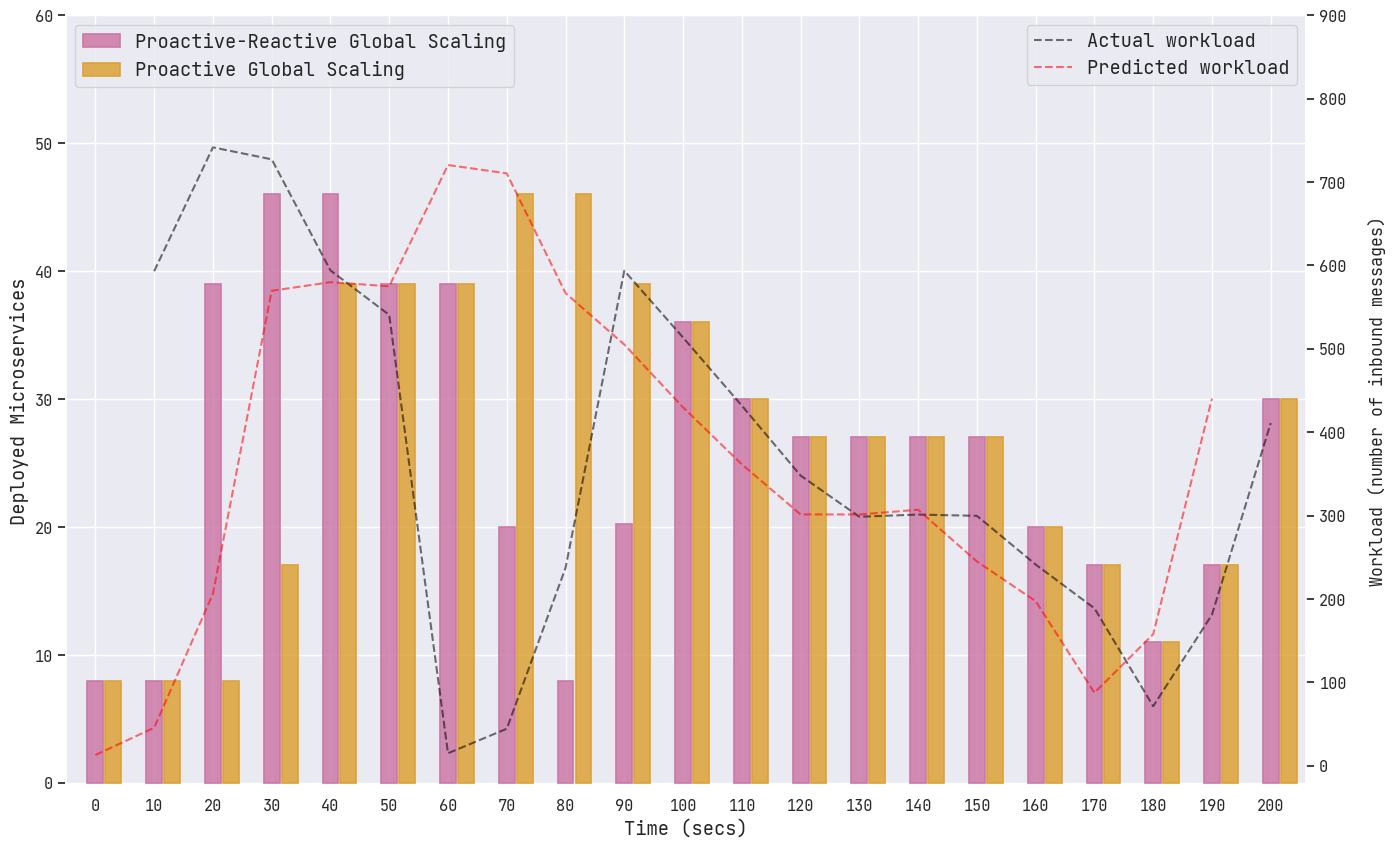

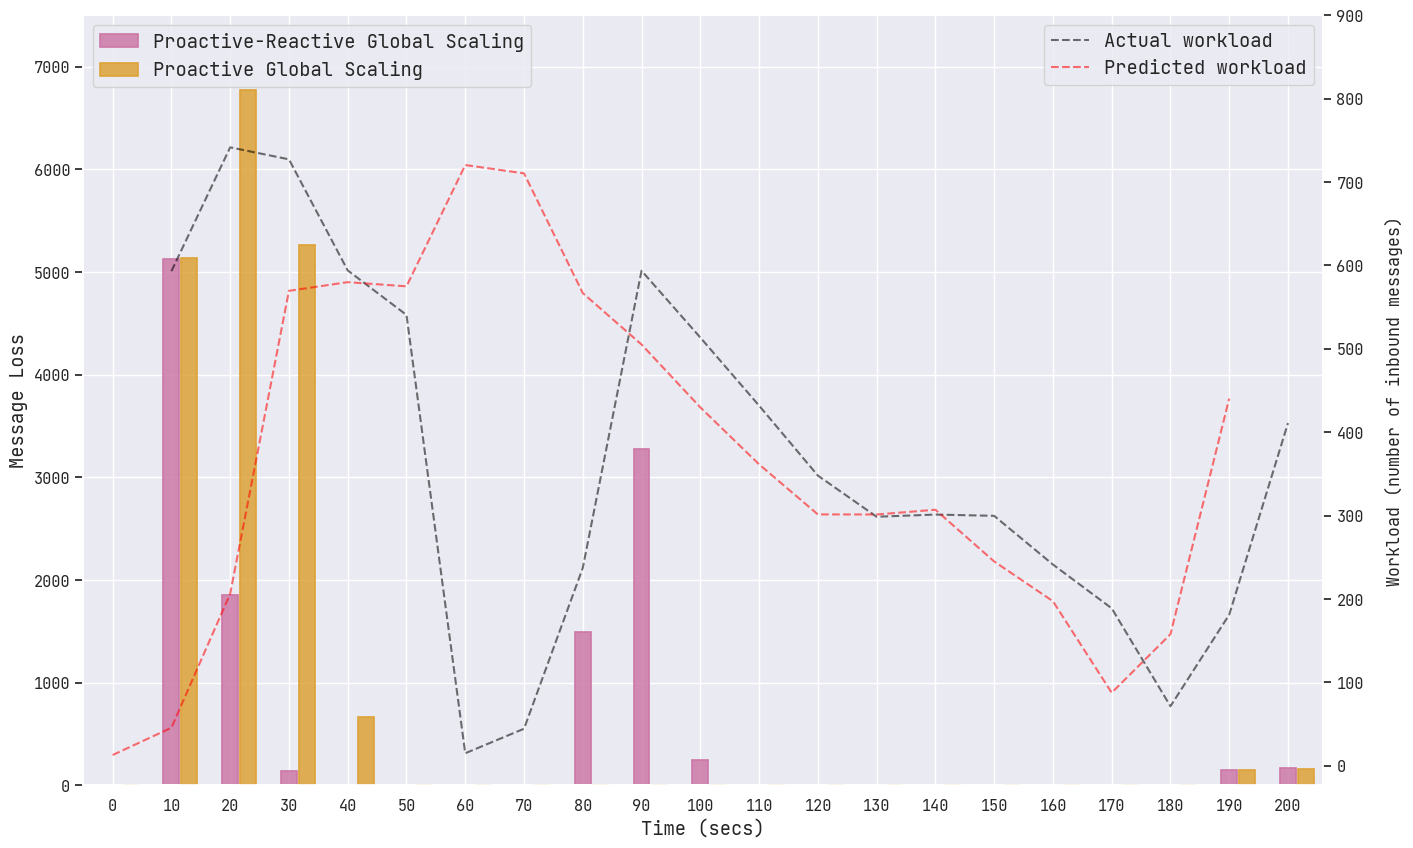

In [459]:
for target_col, target_label, save_label in zip(target_cols, target_labels, save_labels):
    x = avg_impl_proactive_gs_email_sys['Time (ms)']
    y_msgs = avg_spec_proactive_gs_email_sys['Measured Workload']
    y_pred = avg_spec_proactive_gs_email_sys['Predicted Workload']
    y_proactive = avg_spec_proactive_gs_email_sys[target_col]
    y_pr_r = avg_spec_proactive_reactive_gs_email_sys[target_col]
    fig = plt.figure(figsize=[16,10])
    ax = plt.subplot(111)
    ax_background = ax.twinx()

    width = 2.7

    if save_label == 'latency':
        up = 800
        down = -1
    elif save_label == 'deployed_instaces':
        up = 60
        down = -.2
    else:
        up = 7500
        down = -1
        
    # define plots
    pr = ax.bar(
        x, 
        y_pr_r, 
        linestyle='solid', 
        facecolor=facecolor_hybrid,
        edgecolor=edgecolor_hybrid,
        linewidth=1.2,
        label=label_hybrid,
        zorder=1,
        width=width,
    )

    p = ax.bar(
        x+width+0.35, 
        y_proactive, 
        linestyle='solid', 
        facecolor=facecolor_proactive_global,
        edgecolor=edgecolor_proactive_global,
        linewidth=1.2,
        label=label_proactive_global, 
        zorder=10,
        width=width,
    )

    # define background plot
    arrived_msgs = ax_background.plot(x[1:], y_msgs[1:], linestyle='dashed', label='Actual workload', color='black', zorder=1000, alpha=.55)
    predicted_msgs = ax_background.plot(x[0:-1], y_pred[0:-1], linestyle='dashed', label='Predicted workload', color='red', zorder=1000, alpha=.55)

    # set axis limits
    ax.set_yscale('linear')
    ax.set_xlim(-5, 206)
    ax.set_ylim(down, up)

    # set ticks and labels
    ax.set_ylabel(target_label, fontsize=13.5)
    ax.set_xlabel('Time (secs)', fontsize=13.5)
    ax.set_xticks(range(0, 210, 10))
    #ax.set_xticklabels(['10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '00', '01', '02', '03', '04', '05', '06'])

    # background ticks and labels
    ax_background.set_yticks(range(0, 1000, 100))
    ax_background.grid(False)
    ax_background.yaxis.set_label_coords(1.05, 0.5)
    ax_background.set_ylabel('Workload (number of inbound messages)')

    # legend settings
    ax.legend(loc='upper left', ncol=1, frameon=True, fontsize=13.5)
    ax_background.legend(loc='upper right', ncol=1, frameon=True, fontsize=13.5)

    fig.savefig(f'./fig/{save_label}_{system_data}_{level}_outliers_proactive_reactiveG_vs_proactiveG.pdf', dpi=300, format='pdf', bbox_inches='tight')

## Implementation Level

In [460]:
level = 'implementation_level'

### TeaStore

In [461]:
target_cols = ['Latency (ms)', 'Deployed instances', 'Message Loss']
target_labels = ['Latency (milliseconds)', 'Deployed Microservices', 'Message Loss']
save_labels = ['latency', 'deployed_instaces', 'loss']
run = 25
system_data = 'teastore'
gs_data = 'reactive_gs'
ls_data = 'reactive_ls'
column_names = [
    "Time (ms)", 
    "Latency (ms)", 
    "Measured Workload",
    "Completed msgs",
    "Message Loss",
    "Deployed instances",
]

In [462]:
dfs_global_impl_teastore = []
dfs_local_impl_teastore = []

global_files = [level + '/' + system_data + '/' + gs_data + '/' + 'run' + str(x) + '.txt' for x in range(1,26)]
local_files = [level + '/' + system_data + '/' + ls_data + '/' + 'run' + str(x) + '.txt' for x in range(1,26)]

for file in global_files: 
    df = pd.read_csv(file, sep='\s+', usecols=usecols_global, names=column_names, skiprows=[])
    dfs_global_impl_teastore += [df]

for file in local_files: 
    df = pd.read_csv(file, sep='\s+', usecols=usecols_local, names=column_names, skiprows=[])
    dfs_local_impl_teastore += [df]

avg_impl_reactive_gs_teastore = pd.concat(dfs_global_impl_teastore).groupby(level=0).mean()
avg_impl_reactive_ls_teastore = pd.concat(dfs_local_impl_teastore).groupby(level=0).mean()

<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
/var/folders/jy/fgsfhg4173l0ht09bdq58g5r0000gn/T/ipykernel_15685/68634755.py:8: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(file, sep='\s+', usecols=usecols_global, names=column_names, skiprows=[])
/var/folders/jy/fgsfhg4173l0ht09bdq58g5r0000gn/T/ipykernel_15685/68634755.py:12: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(file, sep='\s+', usecols=usecols_local, names=column_names, skiprows=[])


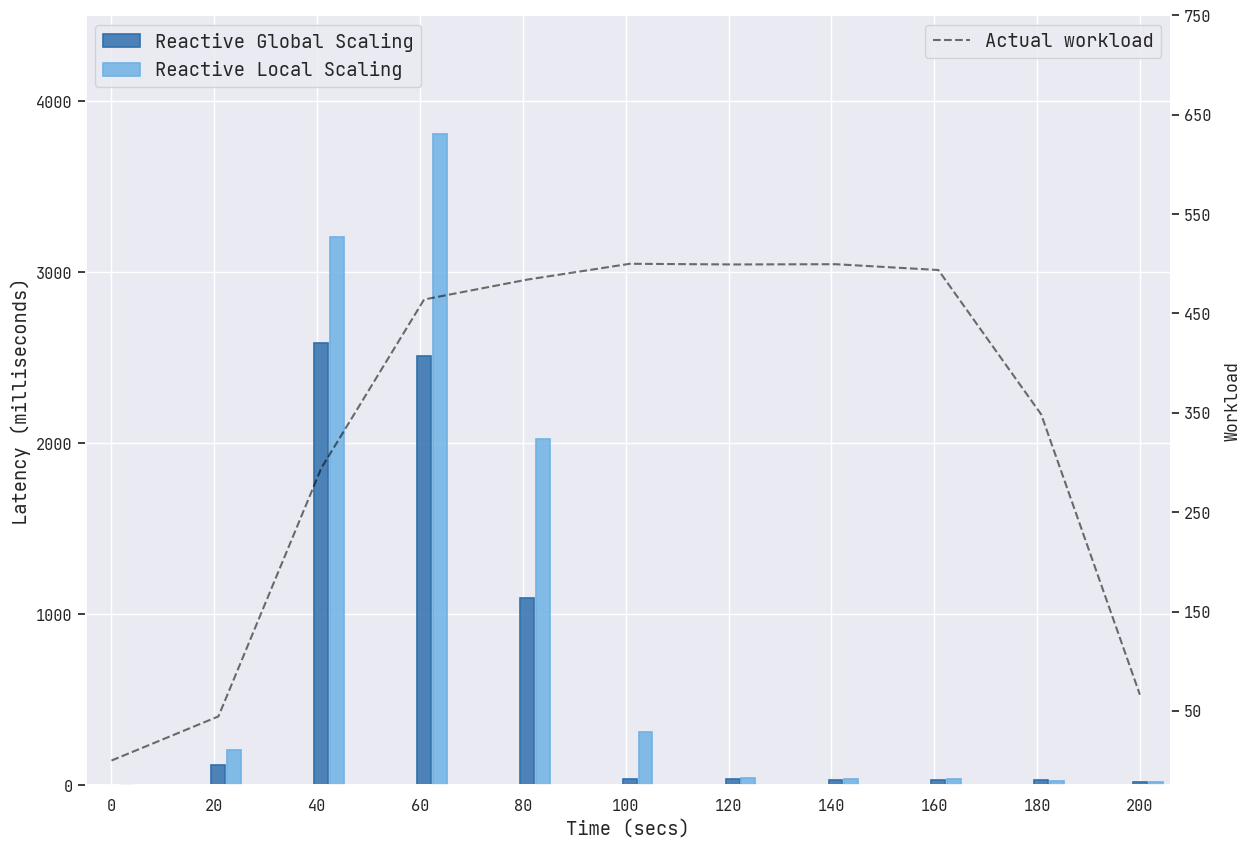

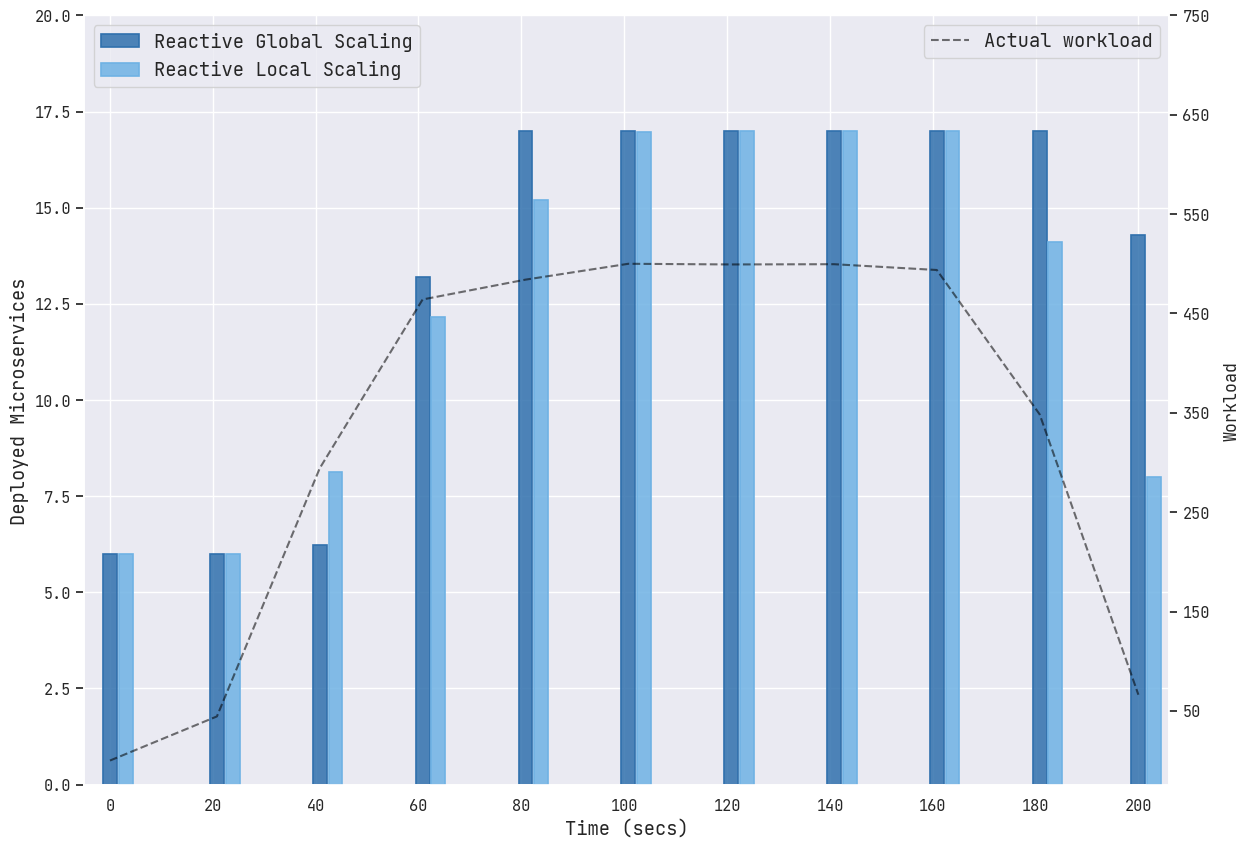

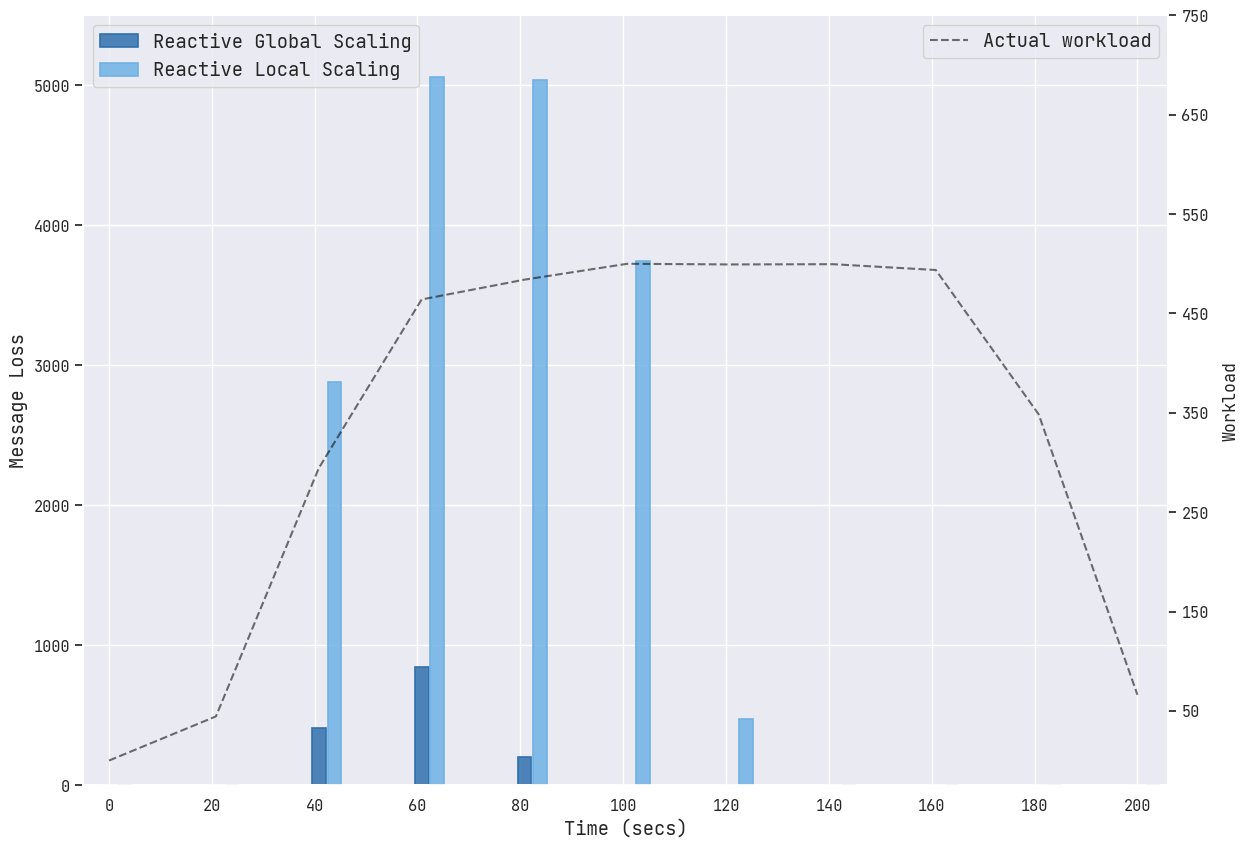

In [463]:
for target_col, target_label, save_label in zip(target_cols, target_labels, save_labels):
    x = avg_impl_reactive_gs_teastore['Time (ms)']
    y_msgs = avg_impl_reactive_gs_teastore['Measured Workload']
    y_global = avg_impl_reactive_gs_teastore[target_col]
    y_local = avg_impl_reactive_ls_teastore[target_col]
    fig = plt.figure(figsize=[14,10])
    ax = plt.subplot(111)
    ax_background = ax.twinx()

    width = 2.7

    if save_label == 'latency':
        up = 4500
        down = -1
    elif save_label == 'deployed_instaces':
        up = 20
        down = -.02
    else:
        up = 5500
        down = -1


    # define plots
    g = ax.bar(
        x, 
        y_global, 
        linestyle='solid', 
        facecolor=facecolor_reactive_global,
        edgecolor=edgecolor_reactive_global,
        linewidth=1.2,
        label=label_reactive_global,
        zorder=1,
        width=width,
    )
    l = ax.bar(
        x+width+0.35, 
        y_local, 
        linestyle='solid', 
        facecolor=facecolor_reactive_local,
        edgecolor=edgecolor_reactive_local,
        linewidth=1.2,
        label=label_reactive_local, 
        zorder=100,
        width=width,
    )


    # define background plot
    arrived_msgs = ax_background.plot(x, y_msgs, linestyle='dashed', label='Actual workload', color='black', zorder=1000, alpha=.55)

    # set axis limits
    ax.set_yscale('linear')
    ax.set_xlim(-5, 206)
    ax.set_ylim(down, up)

    # set ticks and labels
    ax.set_ylabel(target_label, fontsize=13.5)
    ax.set_xlabel('Time (secs)', fontsize=13.5)
    ax.set_xticks(range(0, 210, 20))
    #ax.set_xticklabels(['10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '00', '01', '02', '03', '04', '05', '06'])

    # background ticks and labels
    ax_background.set_yticks(range(50, 800, 100))
    ax_background.grid(False)
    ax_background.yaxis.set_label_coords(1.05, 0.5)
    ax_background.set_ylabel('Workload')

    # legend settings
    ax.legend(loc='upper left', ncol=1, frameon=True, fontsize=13.5)
    ax_background.legend(loc='upper right', ncol=1, frameon=True, fontsize=13.5)

    fig.savefig(f'./fig/{save_label}_{system_data}_{level}_reactiveL_vs_reactiveG.pdf', dpi=300, format='pdf', bbox_inches='tight')

### Email System

In [464]:
target_cols = ['Latency (ms)', 'Deployed instances', 'Message Loss']
target_labels = ['Latency (milliseconds)', 'Deployed Microservices', 'Message Loss']
save_labels = ['latency', 'deployed_instaces', 'loss']
run = 25
system_data = 'email_sys'
gs_data = 'reactive_gs'
ls_data = 'reactive_ls'
proactive_gs_data = 'proactive_gs_outliers'
proactive_reactive_data = 'proactive_reactive_gs_outliers'

column_names = [
    "Time (ms)", 
    "Latency (ms)", 
    "Measured Workload",
    "Completed msgs",
    "Message Loss",
    "Deployed instances",
]

column_names_proactive = [
    "Time (ms)", 
    "Latency (ms)", 
    "Predicted Workload",
    "Measured Workload",
    "Completed msgs",
    "Message Loss",
    "Deployed instances",
]

In [465]:
dfs_reactive_gs_impl_email_sys = []
dfs_reactive_ls_impl_email_sys = []
dfs_proactive_gs_impl_email_sys = []
dfs_proactive_reactive_gs_impl_email_sys = []

global_files = [level + '/' + system_data + '/' + gs_data + '/' + 'run' + str(x) + '.txt' for x in range(1,26)]
local_files = [level + '/' + system_data + '/' + ls_data + '/' + 'run' + str(x) + '.txt' for x in range(1,26)]
proactive_gs_files = [level + '/' + system_data + '/' + proactive_gs_data + '/' + 'run' + str(x) + '.txt' for x in range(1,26)]
proactive_reactive_gs_files = [level + '/' + system_data + '/' + proactive_reactive_data + '/' + 'run' + str(x) + '.txt' for x in range(1,26)]



for file in global_files: 
    df = pd.read_csv(file, sep='\s+', usecols=usecols_global, names=column_names, skiprows=[])
    dfs_reactive_gs_impl_email_sys += [df]

for file in local_files: 
    df = pd.read_csv(file, sep='\s+', usecols=usecols_local2, names=column_names, skiprows=[])
    dfs_reactive_ls_impl_email_sys += [df]

for file in proactive_gs_files: 
    df = pd.read_csv(file, sep='\s+', usecols=usecols_proactive, names=column_names_proactive, skiprows=[])
    dfs_proactive_gs_impl_email_sys += [df]

for file in proactive_reactive_gs_files: 
    df = pd.read_csv(file, sep='\s+', usecols=usecols_proactive_reactive, names=column_names_proactive, skiprows=[])
    dfs_proactive_reactive_gs_impl_email_sys += [df]

avg_impl_reactive_gs_email_sys = pd.concat(dfs_reactive_gs_impl_email_sys).groupby(level=0).mean()
avg_impl_reactive_ls_email_sys = pd.concat(dfs_reactive_ls_impl_email_sys).groupby(level=0).mean()
avg_impl_proactive_gs_email_sys = pd.concat(dfs_proactive_gs_impl_email_sys).groupby(level=0).mean()
avg_impl_proactive_reactive_gs_email_sys = pd.concat(dfs_proactive_reactive_gs_impl_email_sys).groupby(level=0).mean()

<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:22: SyntaxWarning: invalid escape sequence '\s'
<>:26: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:22: SyntaxWarning: invalid escape sequence '\s'
<>:26: SyntaxWarning: invalid escape sequence '\s'
/var/folders/jy/fgsfhg4173l0ht09bdq58g5r0000gn/T/ipykernel_15685/97575184.py:14: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(file, sep='\s+', usecols=usecols_global, names=column_names, skiprows=[])
/var/folders/jy/fgsfhg4173l0ht09bdq58g5r0000gn/T/ipykernel_15685/97575184.py:18: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(file, sep='\s+', usecols=usecols_local2, names=column_names, skiprows=[])
/var/folders/jy/fgsfhg4173l0ht09bdq58g5r0000gn/T/ipykernel_15685/97575184.py:22: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(file, sep='\

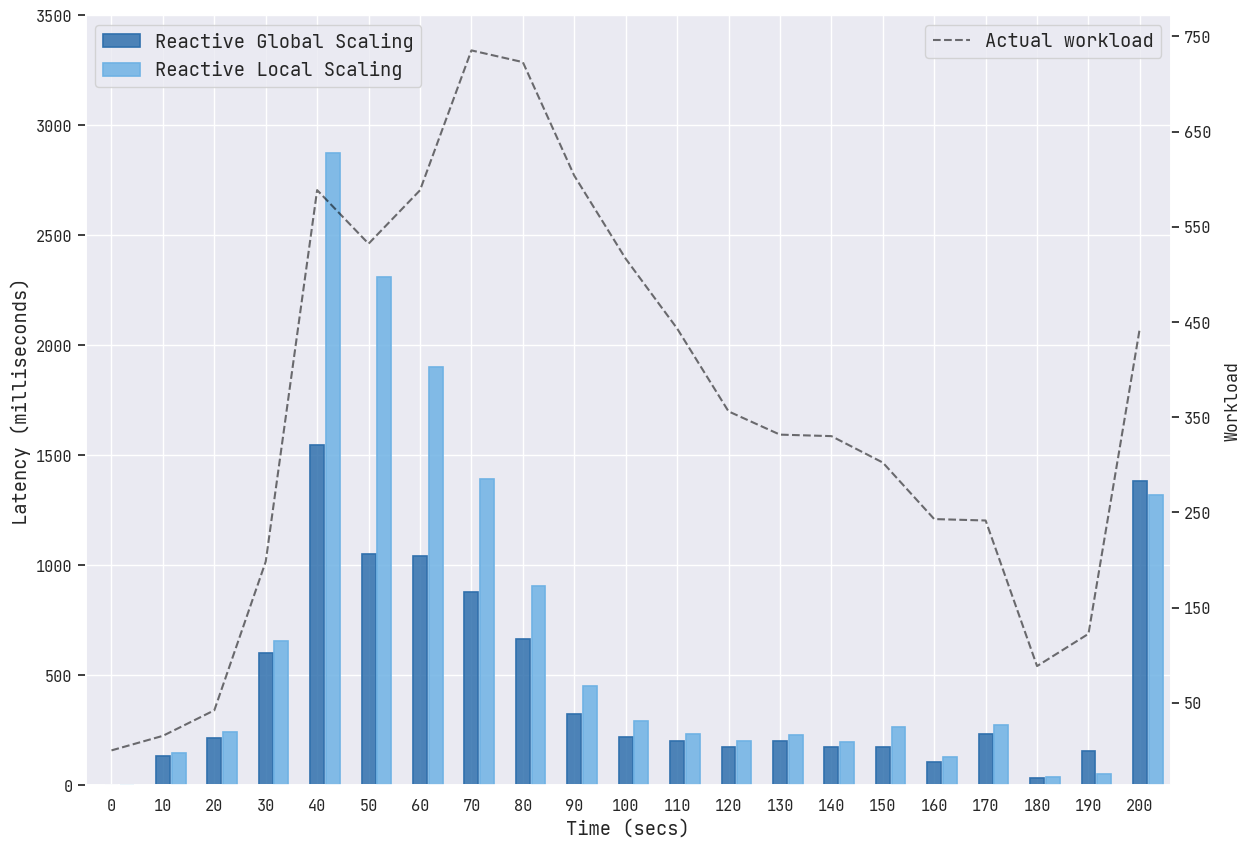

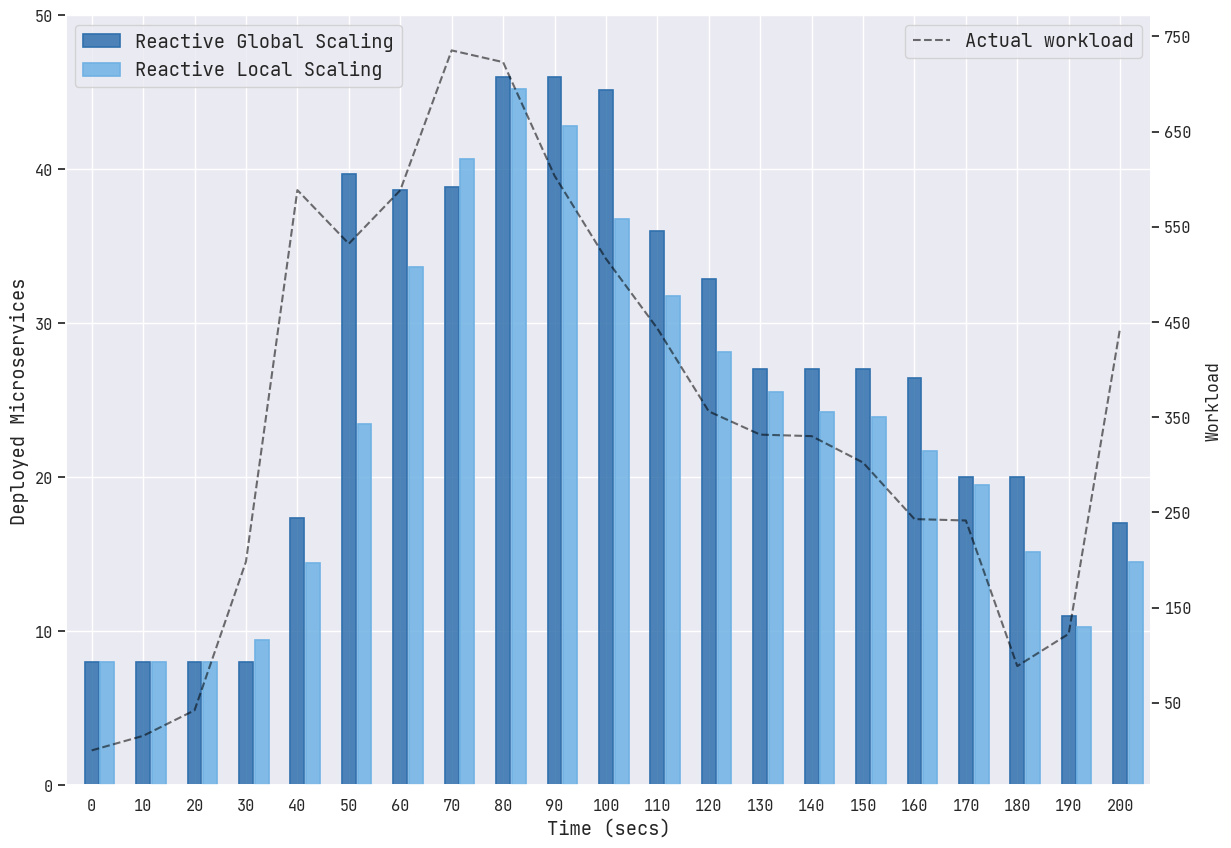

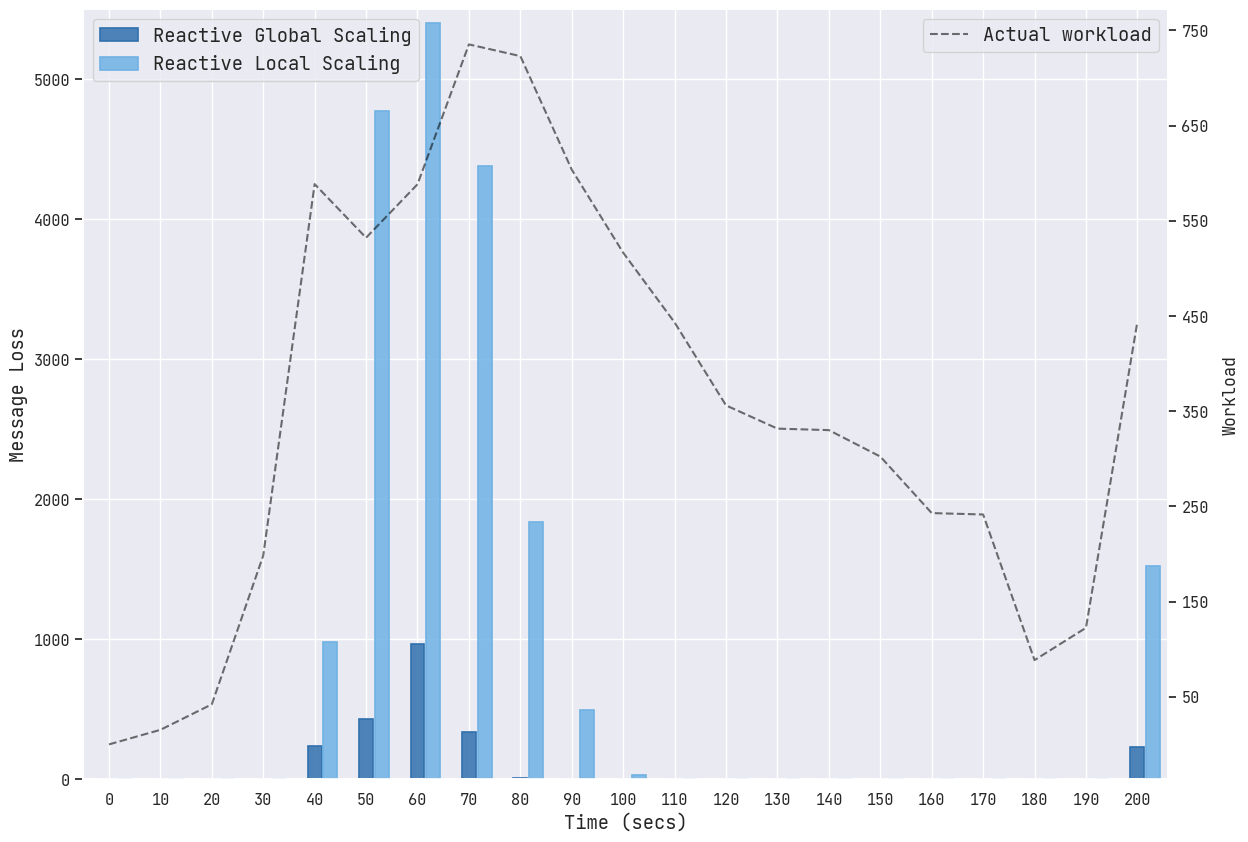

In [466]:
for target_col, target_label, save_label in zip(target_cols, target_labels, save_labels):
    x = avg_impl_reactive_gs_email_sys['Time (ms)']
    y_msgs = avg_impl_reactive_gs_email_sys['Measured Workload']
    y_global = avg_impl_reactive_gs_email_sys[target_col]
    y_local = avg_impl_reactive_ls_email_sys[target_col]
    fig = plt.figure(figsize=[14,10])
    ax = plt.subplot(111)
    ax_background = ax.twinx()

    width = 2.7

    if save_label == 'latency':
        up = 3500
        down = -1
    elif save_label == 'deployed_instaces':
        up = 50
        down = -.02
    else:
        up = 5500
        down = -1


    # define plots
    g = ax.bar(
        x, 
        y_global, 
        linestyle='solid', 
        facecolor=facecolor_reactive_global,
        edgecolor=edgecolor_reactive_global,
        linewidth=1.2,
        label=label_reactive_global,
        zorder=1,
        width=width,
    )
    l = ax.bar(
        x+width+0.35, 
        y_local, 
        linestyle='solid', 
        facecolor=facecolor_reactive_local,
        edgecolor=edgecolor_reactive_local,
        linewidth=1.2,
        label=label_reactive_local, 
        zorder=100,
        width=width,
    )


    # define background plot
    arrived_msgs = ax_background.plot(x, y_msgs, linestyle='dashed', label='Actual workload', color='black', zorder=1000, alpha=.55)

    # set axis limits
    ax.set_yscale('linear')
    ax.set_xlim(-5, 206)
    ax.set_ylim(down, up)

    # set ticks and labels
    ax.set_ylabel(target_label, fontsize=13.5)
    ax.set_xlabel('Time (secs)', fontsize=13.5)
    ax.set_xticks(range(0, 210, 10))
    #ax.set_xticklabels(['10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '00', '01', '02', '03', '04', '05', '06'])

    # background ticks and labels
    ax_background.set_yticks(range(50, 800, 100))
    ax_background.grid(False)
    ax_background.yaxis.set_label_coords(1.05, 0.5)
    ax_background.set_ylabel('Workload')

    # legend settings
    ax.legend(loc='upper left', ncol=1, frameon=True, fontsize=13.5)
    ax_background.legend(loc='upper right', ncol=1, frameon=True, fontsize=13.5)

    fig.savefig(f'./fig/{save_label}_{system_data}_{level}_reactiveL_vs_reactiveG.pdf', dpi=300, format='pdf', bbox_inches='tight')

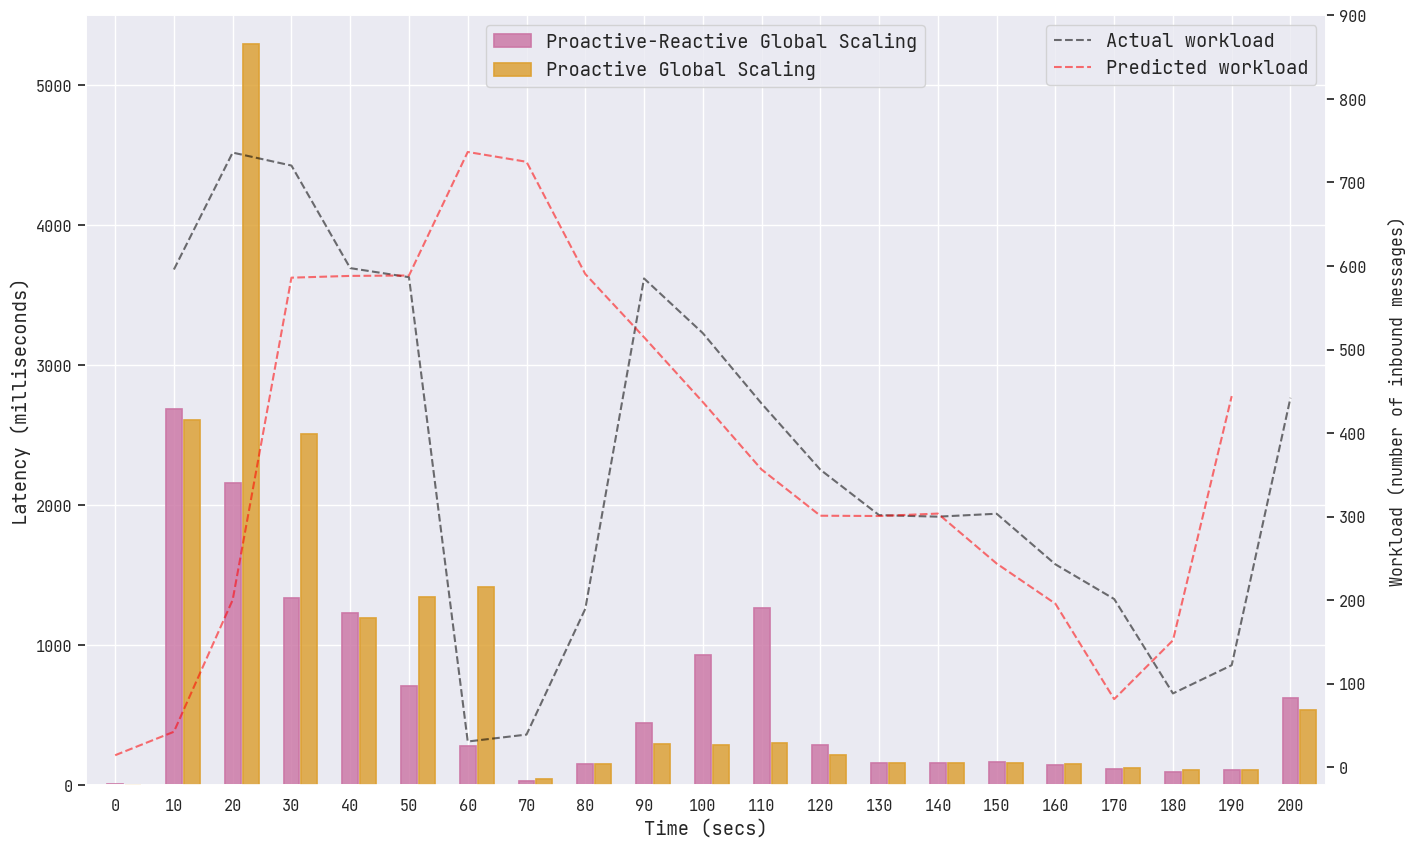

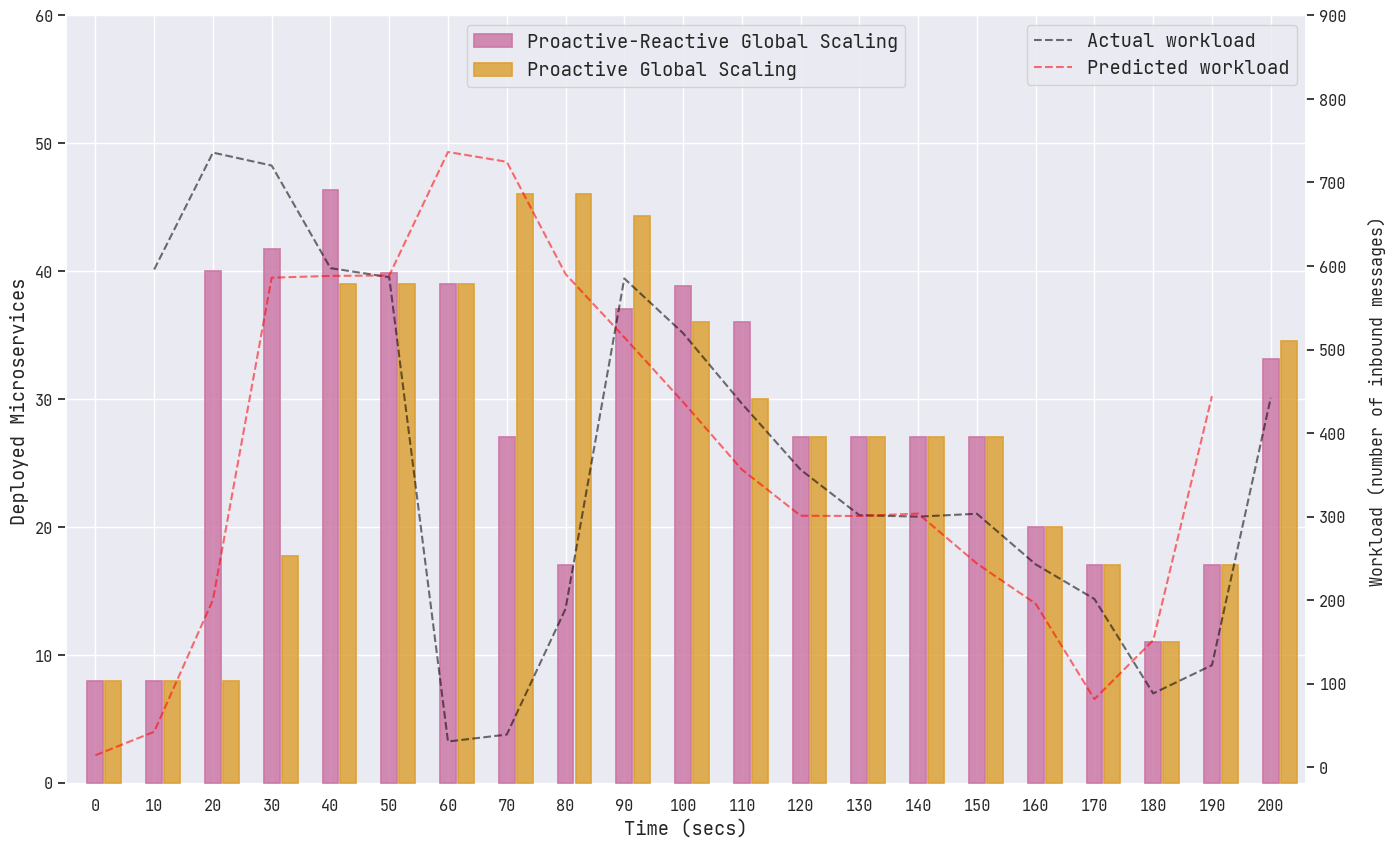

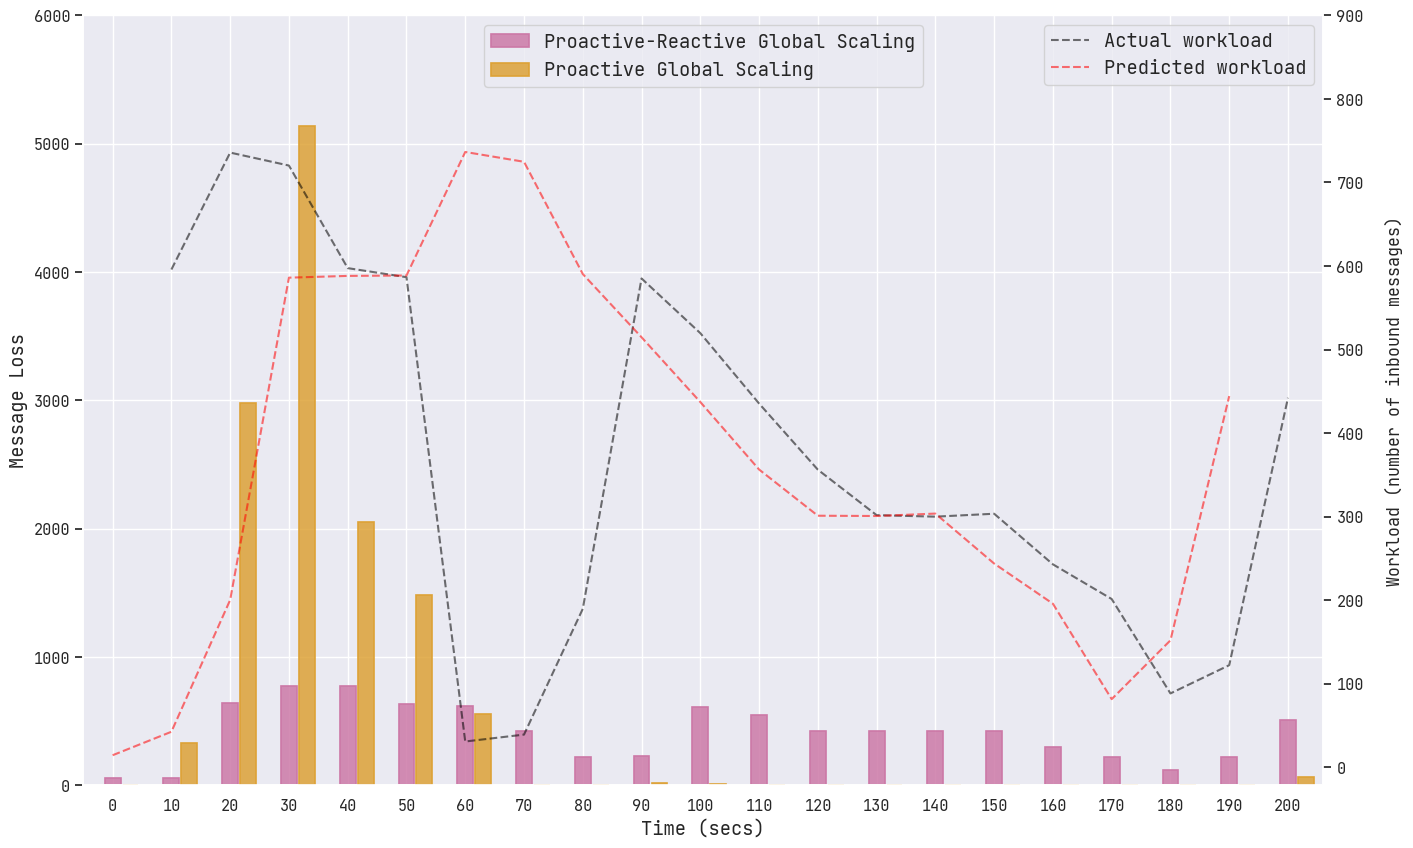

In [467]:
for target_col, target_label, save_label in zip(target_cols, target_labels, save_labels):
    x = avg_impl_proactive_gs_email_sys['Time (ms)']
    y_msgs = avg_impl_proactive_gs_email_sys['Measured Workload']
    y_pred = avg_impl_proactive_gs_email_sys['Predicted Workload']
    y_proactive = avg_impl_proactive_gs_email_sys[target_col]
    y_pr_r = avg_impl_proactive_reactive_gs_email_sys[target_col]
    fig = plt.figure(figsize=[16,10])
    ax = plt.subplot(111)
    ax_background = ax.twinx()

    width = 2.7

    if save_label == 'latency':
        up = 5500
        down = -1
    elif save_label == 'deployed_instaces':
        up = 60
        down = -.2
    else:
        up = 6000
        down = -1
        
    # define plots
    pr = ax.bar(
        x, 
        y_pr_r, 
        linestyle='solid', 
        facecolor=facecolor_hybrid,
        edgecolor=edgecolor_hybrid,
        linewidth=1.2,
        label=label_hybrid,
        zorder=1,
        width=width,
    )

    p = ax.bar(
        x+width+0.35, 
        y_proactive, 
        linestyle='solid', 
        facecolor=facecolor_proactive_global,
        edgecolor=edgecolor_proactive_global,
        linewidth=1.2,
        label=label_proactive_global, 
        zorder=10,
        width=width,
    )

    # define background plot
    arrived_msgs = ax_background.plot(x[1:], y_msgs[1:], linestyle='dashed', label='Actual workload', color='black', zorder=1000, alpha=.55)
    predicted_msgs = ax_background.plot(x[0:-1], y_pred[0:-1], linestyle='dashed', label='Predicted workload', color='red', zorder=1000, alpha=.55)

    # set axis limits
    ax.set_yscale('linear')
    ax.set_xlim(-5, 206)
    ax.set_ylim(down, up)

    # set ticks and labels
    ax.set_ylabel(target_label, fontsize=13.5)
    ax.set_xlabel('Time (secs)', fontsize=13.5)
    ax.set_xticks(range(0, 210, 10))
    #ax.set_xticklabels(['10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '00', '01', '02', '03', '04', '05', '06'])

    # background ticks and labels
    ax_background.set_yticks(range(0, 1000, 100))
    ax_background.grid(False)
    ax_background.yaxis.set_label_coords(1.05, 0.5)
    ax_background.set_ylabel('Workload (number of inbound messages)')

    # legend settings
    ax.legend(loc='upper center', ncol=1, frameon=True, fontsize=13.5)
    ax_background.legend(loc='upper right', ncol=1, frameon=True, fontsize=13.5)

    fig.savefig(f'./fig/{save_label}_{system_data}_{level}_outliers_proactive_reactiveG_vs_proactiveG.pdf', dpi=300, format='pdf', bbox_inches='tight')

# Behavioural Fidelity Analysis

## Service Replication

### Teastore

In [468]:
delta_spec_ls_vs_gs_teastore =  avg_spec_reactive_ls_teastore - avg_spec_reactive_gs_teastore
delta_impl_ls_vs_gs_teastore = avg_impl_reactive_ls_teastore - avg_impl_reactive_gs_teastore

cols = ["Latency (ms)", "Message Loss"]

for col in cols:
    r, p_value = pearsonr(delta_spec_ls_vs_gs_teastore[col],delta_impl_ls_vs_gs_teastore[col])
    print(f"Pearson r for {col} = {r:.4f}, p-value = {p_value:.4e}")

Pearson r for Latency (ms) = 0.7567, p-value = 7.0222e-03
Pearson r for Message Loss = 0.7507, p-value = 7.7643e-03


## Email System

In [470]:
delta_spec_ls_vs_gs_email_sys =  avg_spec_reactive_ls_email_sys - avg_spec_reactive_gs_email_sys
delta_impl_ls_vs_gs_email_sys = avg_impl_reactive_ls_email_sys - avg_impl_reactive_gs_email_sys
delta_spec_p_vs_pr_email_sys = avg_spec_proactive_gs_email_sys - avg_spec_proactive_reactive_gs_email_sys
delta_impl_p_vs_pr_email_sys = avg_impl_proactive_gs_email_sys - avg_impl_proactive_reactive_gs_email_sys

cols = ["Latency (ms)", "Message Loss"]

for col in cols:
    r1, p_value1 = pearsonr(delta_spec_ls_vs_gs_email_sys[col],delta_impl_ls_vs_gs_email_sys[col])
    print(f"Pearson r for {col} (reactive local vs reactive global) = {r1:.4f}, p-value = {p_value1:.4e}")
    r2, p_value2 = pearsonr(delta_spec_p_vs_pr_email_sys[col],delta_impl_p_vs_pr_email_sys[col])
    print(f"Pearson r for {col} (proactive global vs proactive-reactive global) = {r2:.4f}, p-value = {p_value2:.4e}") 

Pearson r for Latency (ms) (reactive local vs reactive global) = 0.8063, p-value = 1.0175e-05
Pearson r for Latency (ms) (proactive global vs proactive-reactive global) = 0.7441, p-value = 1.0991e-04
Pearson r for Message Loss (reactive local vs reactive global) = 0.8989, p-value = 3.0753e-08
Pearson r for Message Loss (proactive global vs proactive-reactive global) = 0.8299, p-value = 3.2682e-06
